# Exchange rate puzzles - data update

### Backus-Smith Puzzle

In [3]:
# Import libraries
!pip install pandas openpyxl
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt

In [4]:
# Get current working directory
import os
os.getcwd()

'/Users/virginiaballesteroskisielewska/Documents/MPhil Economics - Y1/RA /Code/202606_FX_Puzzles'

#### Summary of calculations

##### Real FX
1) Nominal FX data from FRED: domestic for foreign
2) Price ratio using GDP deflator data from OECD (both base year 2015): foreign deflator / domestic deflator
3) Real FX: Nominal FX * price ratio
4) Difference of log of real FX

##### Consumption ratio
1) Consumption ratio: (Consumption foreign / Real FX) / Consumption domestic
2) Difference of log of consumption ratio

#### Nominal FX data

Currency Conversions: US Dollar Exchange Rate: Average of Daily Rates: National Currency: USD for Euro Area (19 Countries) (CCUSMA02EZM618N) - https://fred.stlouisfed.org/series/CCUSMA02EZM618N

Note: Downloaded as quarterly data.

In [61]:
# Read nominal FX (US for EUR) data
Nominal_USEUR = pd.read_excel('/Users/virginiaballesteroskisielewska/Documents/MPhil Economics - Y1/RA /Code/202406_FX_Puzzles_Replication/Data/NominalFX_USDforEUR_quarterly_FRED.xlsx',
                             skiprows = 10)

# Rename columns
Nominal_USEUR.columns = ['Date', 'Nominal_ER']

# Convert date column to datetime format
Nominal_USEUR['Date'] = pd.to_datetime(Nominal_USEUR['Date'])

# Set the date column as the index
Nominal_USEUR.set_index('Date', inplace = True)

In [218]:
Nominal_USEUR.head()

,Nominal_ER
Date,
1990-01-01,0.829267
1990-04-01,0.818067
1990-07-01,0.771433
1990-10-01,0.731933
1991-01-01,0.747033


<Axes: xlabel='Date'>

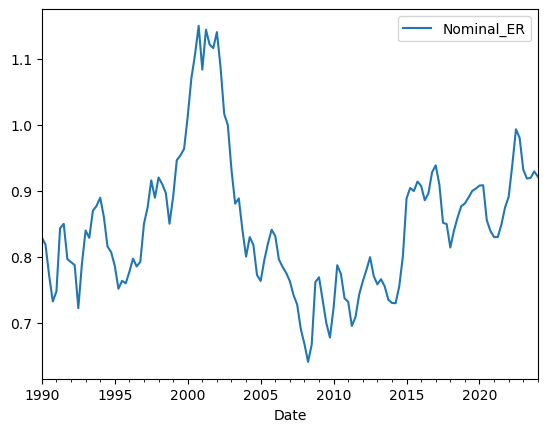

In [65]:
Nominal_USEUR.plot()

### OECD national accounts data

Main Economic Indicators Publication: National Accounts - https://stats.oecd.org/index.aspx?queryid=17091#

In [105]:
# Read nominal ER (US for EUR) data
OECD_NationalAccounts = pd.read_csv('/Users/virginiaballesteroskisielewska/Documents/MPhil Economics - Y1/RA /Code/202406_FX_Puzzles_Replication/Data/OECD_NationalAccounts.csv')

/var/folders/lc/fhkbyqxd1txgsffv3btwztjw0000gn/T/ipykernel_63543/995167765.py:2: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  OECD_NationalAccounts = pd.read_csv('/Users/virginiaballesteroskisielewska/Documents/MPhil Economics - Y1/RA /Code/202406_FX_Puzzles_Replication/Data/OECD_NationalAccounts.csv')


In [107]:
# DEFLATOR DATA

# Filter the data 
subject_filter = "National Accounts > National Accounts Deflators > Gross Domestic Product > GDP Deflator"
frequency_filter = "Quarterly"
filtered_df = OECD_NationalAccounts[
    (OECD_NationalAccounts['Subject'] == subject_filter) &
    (OECD_NationalAccounts['Frequency'] == frequency_filter)
]

# Select needed columns
selected_columns = ['TIME', 'Value', 'Country']
filtered_df = filtered_df[selected_columns]

# Pivot the DataFrame
pivot_df = filtered_df.pivot_table(index=['TIME'], columns='Country', values='Value')

# Reset index to make 'TIME' a column instead of an index
pivot_df.reset_index(inplace=True)

# Convert 'TIME' from (e.g.) '1990-Q1' to a datetime format
pivot_df['Date'] = pd.PeriodIndex(pivot_df['TIME'], freq='Q').to_timestamp()
pivot_df = pivot_df.drop(columns=['TIME'])

# Change index to Date 
pivot_df.set_index('Date', inplace = True)

# Rename the df
GDP_deflator = pivot_df 

# Display the resulting DataFrame
GDP_deflator.tail()



Country,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Czechia,Denmark,...,Russia,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-01,130.321873,120.330813,121.162206,163.794990,125.709728,147.976715,155.566556,120.394705,131.812271,118.144527,...,NaN,122.728572,121.626941,146.029123,115.942267,124.219179,103.271858,555.072160,122.892981,123.405231
2023-01-01,132.573686,124.717666,123.268966,163.782475,124.873591,150.701992,158.385762,121.955395,137.110683,116.794404,...,NaN,126.414616,125.633340,148.233589,118.653547,126.002130,103.622205,634.227569,125.262638,124.605413
2023-04-01,131.036688,125.887113,122.760545,165.176709,125.392322,150.926355,158.879980,119.753520,138.579321,114.997922,...,NaN,128.954258,128.055353,149.435922,118.690915,126.917118,103.576691,673.613313,128.233022,125.124909
2023-07-01,132.320525,126.952943,123.919676,166.247776,127.691121,152.048585,159.386642,119.884139,139.796894,112.973360,...,NaN,132.032298,129.960045,151.851320,119.141377,129.494259,103.843811,864.159299,130.179771,126.148431
2023-10-01,NaN,130.344414,NaN,NaN,NaN,NaN,NaN,119.596855,NaN,NaN,...,NaN,NaN,NaN,NaN,121.761130,NaN,NaN,NaN,NaN,126.624632


In [109]:
# To decide whether to drop 'Time"

# # pivot_df['TIME'] == pivot_df['Time']
# pd.set_option('display.max_rows', None)
# print(pivot_df[['TIME', 'Time']])

In [111]:
# REAL EXCHANGE RATE 

# Calculate ratio of GPD deflators
pivot_df['DEU_USA_deflator'] = pivot_df['Germany'] / pivot_df['United States']

# Set up new empty df for real FX
Real_FX = pd.DataFrame()

# Grab nominal ER from original df
Real_FX['Nominal_ER'] = Nominal_USEUR['Nominal_ER']

# Grab ratio of GDP deflators from df 
Real_FX['DEU_USA_deflator'] = pivot_df['DEU_USA_deflator']

# Calculate real FX in new df
Real_FX['Real_ER'] = Real_FX['Nominal_ER'] * Real_FX['DEU_USA_deflator']

<Axes: xlabel='Date'>

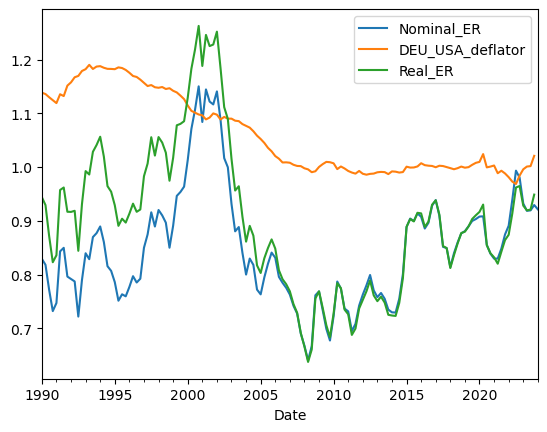

In [113]:
Real_FX.plot()

### Consumption

In [115]:
# Filter data 
subject_filter = "National Accounts > GDP by Expenditure > Constant Prices > Private Final Consumption Expenditure"
frequency_filter = "Quarterly"
measure_filter = "Level, rate or national currency, s.a."
filtered_df = OECD_NationalAccounts[
    (OECD_NationalAccounts['Subject'] == subject_filter) &
    (OECD_NationalAccounts['Frequency'] == frequency_filter) &
    (OECD_NationalAccounts['Measure'] == measure_filter)
]

# Select needed columns
selected_columns = ['TIME', 'Value', 'Country']
filtered_df = filtered_df[selected_columns]

# Pivot the DataFrame
pivot_df = filtered_df.pivot_table(index=['TIME'], columns='Country', values='Value')

# Reset index to make 'TIME' a column instead of an index
pivot_df.reset_index(inplace=True)

# Convert 'TIME' from '1990-Q1' to a datetime format
pivot_df['Date'] = pd.PeriodIndex(pivot_df['TIME'], freq='Q').to_timestamp()
pivot_df = pivot_df.drop(columns=['TIME'])

# Change index to Date 
pivot_df.set_index('Date', inplace = True)

# Rename the df
consumption = pivot_df 

# Display the resulting DataFrame
consumption.head()


Country,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Czechia,Denmark,...,Russia,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,111.945,NaN,NaN,NaN,149.81275,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,60.247573,NaN,NaN,6357.213
1990-04-01,112.444,NaN,NaN,NaN,148.16575,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,60.117754,NaN,NaN,6376.579
1990-07-01,112.641,NaN,NaN,NaN,148.25325,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,60.296229,NaN,NaN,6401.841
1990-10-01,111.999,NaN,NaN,NaN,147.78000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,60.665579,NaN,NaN,6353.139
1991-01-01,112.163,NaN,NaN,NaN,144.83925,NaN,NaN,146.862129,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,61.019367,NaN,NaN,6329.249


In [153]:
# Calculate log variables

# Real_FX['consumption_ratio'] = (consumption['Germany'] / Real_FX['Real_ER']) / consumption['United States'] 
Real_FX['log_change_Real_ER'] = (np.log(Real_FX['Real_ER'])).diff()
# Real_FX['log_change_relative_consumption '] = (np.log(Real_FX['consumption_ratio'])).diff()
Real_FX['log_change_relative_consumption'] = ((np.log(consumption['United States']))-(np.log(consumption['Germany']))).diff()

# Display the resulting Real_FX DataFrame
Real_FX.head()

,Nominal_ER,DEU_USA_deflator,Real_ER,consumption_ratio,log_change_Real_ER,log_change_relative_consumption,rolling_correlation
Date,,,,,,,
1990-01-01,0.829267,1.138329,0.943978,NaN,NaN,NaN,NaN
1990-04-01,0.818067,1.135800,0.929160,NaN,-0.015822,NaN,NaN
1990-07-01,0.771433,1.129842,0.871597,NaN,-0.063953,NaN,NaN
1990-10-01,0.731933,1.124251,0.822877,NaN,-0.057521,NaN,NaN
1991-01-01,0.747033,1.118926,0.835875,0.059392,0.015673,NaN,NaN


## Time series plots

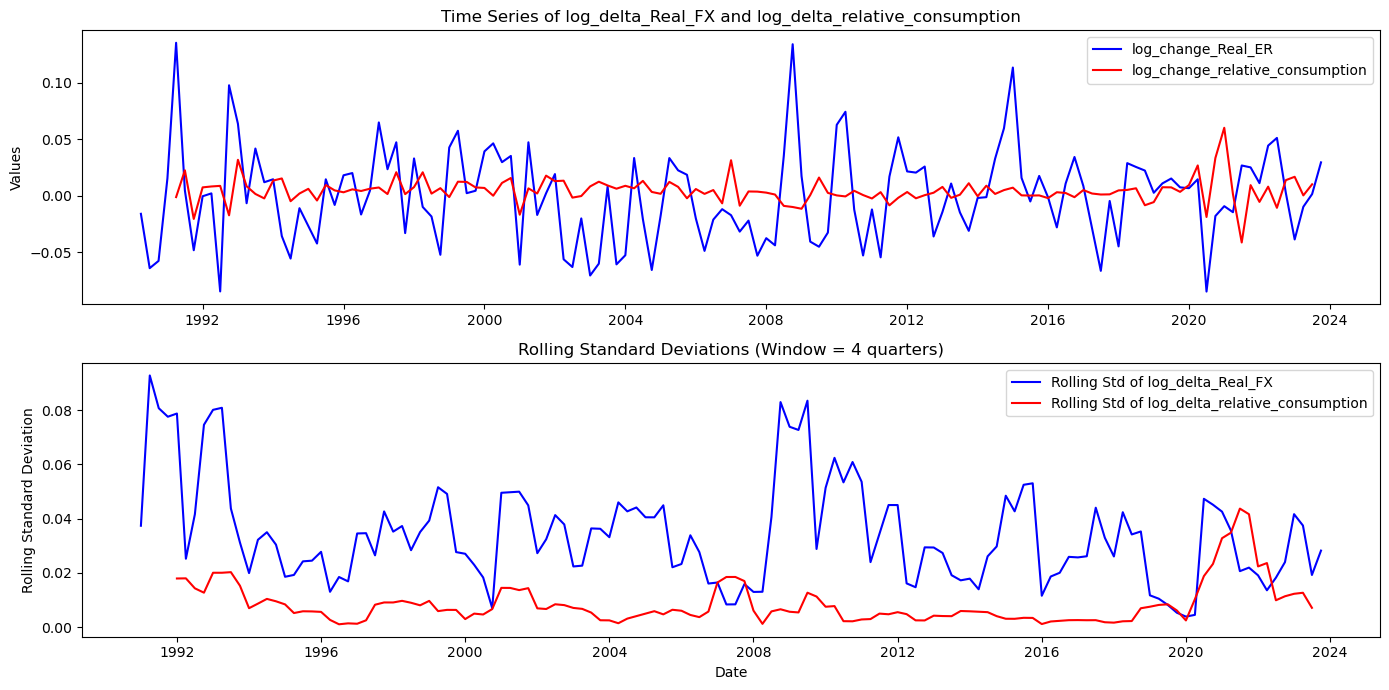

In [222]:
# Plotting the time series
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(Real_FX.index, Real_FX['log_change_Real_ER'], label='log_change_Real_ER', color='blue')
plt.plot(Real_FX.index, Real_FX['log_change_relative_consumption'], label='log_change_relative_consumption', color='red')
plt.title('Time Series of log_delta_Real_FX and log_delta_relative_consumption')
plt.ylabel('Values')
plt.legend(loc='upper right')

# Calculating rolling standard deviations
rolling_window = 4  # 12 periods rolling window
Real_FX['rolling_std_log_change_Real_ER'] = Real_FX['log_change_Real_ER'].rolling(window=rolling_window).std()
Real_FX['rolling_std_log_change_relative_consumption'] = Real_FX['log_change_relative_consumption'].rolling(window=rolling_window).std()

# Plotting the rolling standard deviations
plt.subplot(2, 1, 2)
plt.plot(Real_FX.index, Real_FX['rolling_std_log_change_Real_ER'], label='Rolling Std of log_delta_Real_FX', color='blue')
plt.plot(Real_FX.index, Real_FX['rolling_std_log_change_relative_consumption'], label='Rolling Std of log_delta_relative_consumption', color='red')
plt.title(f'Rolling Standard Deviations (Window = {rolling_window} quarters)')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Correlation plots

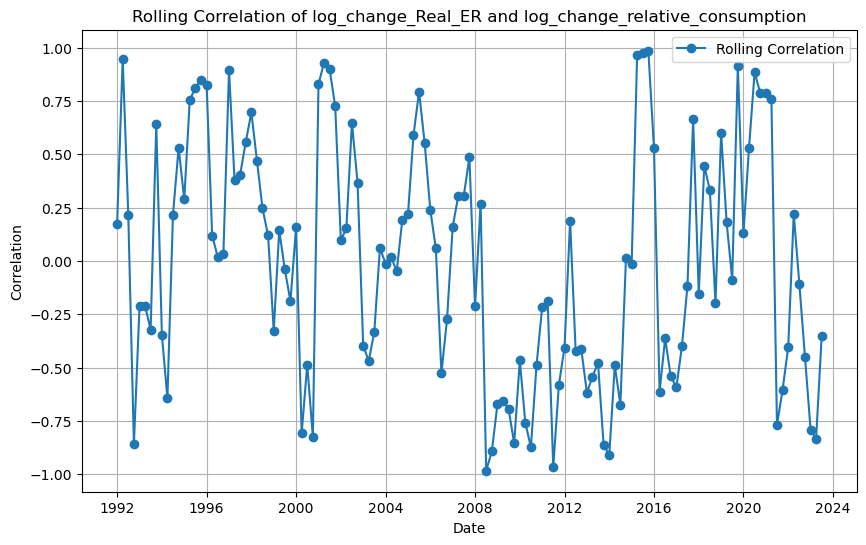

In [141]:
# Calculate the rolling correlation with a window of your choice, e.g., 4 quarters (1 year)
window_size = 4
Real_FX['rolling_correlation'] = Real_FX['log_change_Real_ER'].rolling(window=window_size).corr(Real_FX['log_change_relative_consumption'])

# Plotting the rolling correlation over time
plt.figure(figsize=(10, 6))
plt.plot(Real_FX.index, Real_FX['rolling_correlation'], label='Rolling Correlation', marker='o')

# Adding titles and labels
plt.title('Rolling Correlation of log_change_Real_ER and log_change_relative_consumption')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

/var/folders/lc/fhkbyqxd1txgsffv3btwztjw0000gn/T/ipykernel_63543/2718315461.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Real_FX['rolling_correlation'] = filtered_Real_FX['log_change_Real_ER'].rolling(window=window_size).corr(filtered_Real_FX['log_change_relative_consumption'])


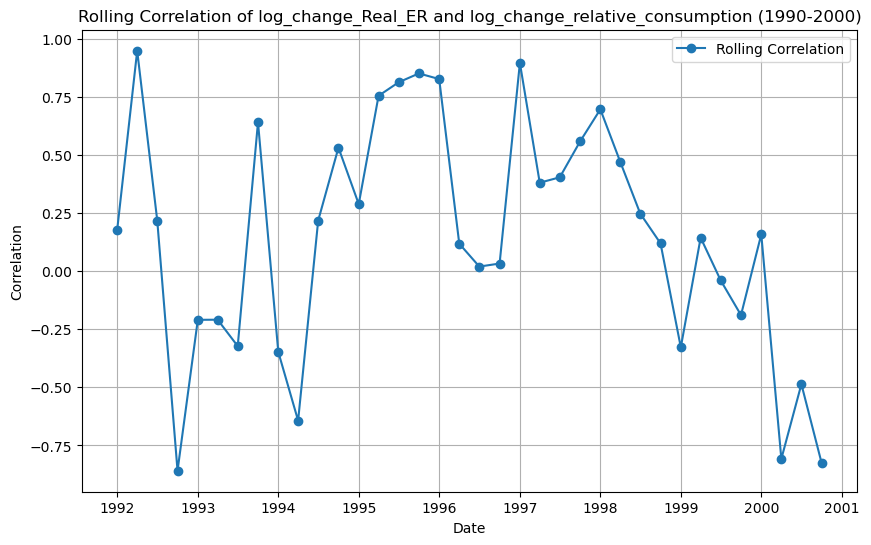

In [24]:
# Filter the DataFrame for the period from 1990 to 2000
start_date = '1990-01-01'
end_date = '2000-12-31'
filtered_Real_FX = Real_FX[(Real_FX.index >= start_date) & (Real_FX.index <= end_date)]

# Calculate the rolling correlation with a window of your choice, e.g., 4 quarters (1 year)
window_size = 4
filtered_Real_FX['rolling_correlation'] = filtered_Real_FX['log_change_Real_ER'].rolling(window=window_size).corr(filtered_Real_FX['log_change_relative_consumption'])

# Plotting the rolling correlation over the filtered date range
plt.figure(figsize=(10, 6))
plt.plot(filtered_Real_FX.index, filtered_Real_FX['rolling_correlation'], label='Rolling Correlation', marker='o')

# Adding titles and labels
plt.title('Rolling Correlation of log_change_Real_ER and log_change_relative_consumption (1990-2000)')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

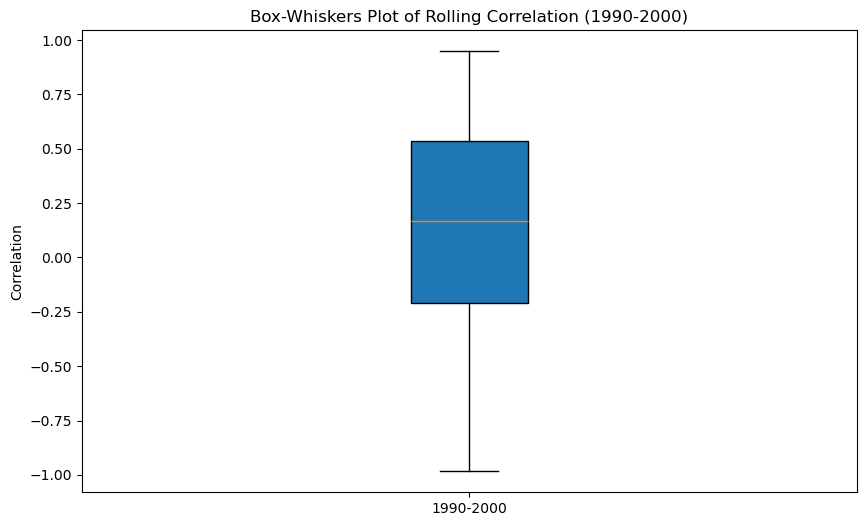

In [211]:
# Filter the DataFrame for the period from 1990 to 2000
start_date = '1990-01-01'
end_date = '2008-12-31'
filtered_Real_FX = Real_FX[(Real_FX.index >= start_date) & (Real_FX.index <= end_date)]

rolling_correlation = filtered_Real_FX['rolling_correlation'].dropna()

# Create a box-whiskers plot
plt.figure(figsize=(10, 6))
plt.boxplot(rolling_correlation, vert=True, patch_artist=True, labels=['1990-2000'])

# Adding titles and labels
plt.title('Box-Whiskers Plot of Rolling Correlation (1990-2000)')
plt.ylabel('Correlation')

# Show the plot
plt.show()